In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def binomial_pmf(n, k, q):
    return math.comb(n, k) * (q ** k) * ((1 - q) ** (n - k))

def tosses(n, q):
    return np.random.binomial(1, q, size=n).sum()

In [10]:
def binomial_test(n_obs, n_trials, q=0.5):
    p_value = 0.0    
    mean = n_trials * q
    distance = abs(n_obs - mean)
        
    p_value = sum(
        binomial_pmf(n_trials, k, q) 
        for k in range(0, n_trials + 1) 
        if abs(k - mean) >= distance
    )
    
    return p_value

In [11]:
def plot_binomial_test(n_trials, n_obs, q=0.5):
    p_value = binomial_test(n_obs, n_trials, q)
    
    ks = np.arange(0, n_trials + 1)
    probs = [binomial_pmf(n_trials, k, q) for k in ks]
    
    low = np.floor(q * n_trials - 1.96 * np.sqrt(n_trials * q * (1 - q)))
    high = np.ceil(q * n_trials + 1.96 * np.sqrt(n_trials * q * (1 - q)))
    colors = ['red' if k <= low or k >= high else 'blue' for k in ks]

    plt.figure(figsize=(9,4))
    plt.bar(ks, probs, color=colors, alpha = 0.5)
    
    plt.axvline(x=n_obs, color='black', linestyle='--', linewidth=1, 
                label=f'Observed: {n_obs} (p={p_value:.4f})')
    
    plt.title(f'Binomial Distribution (n={n_trials}, q={q})')
    plt.xlabel('Number of Heads')
    plt.ylabel('Probability')
    plt.legend()
    
    plt.show()

32 heads in 50 tosses
p = 0.0649
fail to reject H0


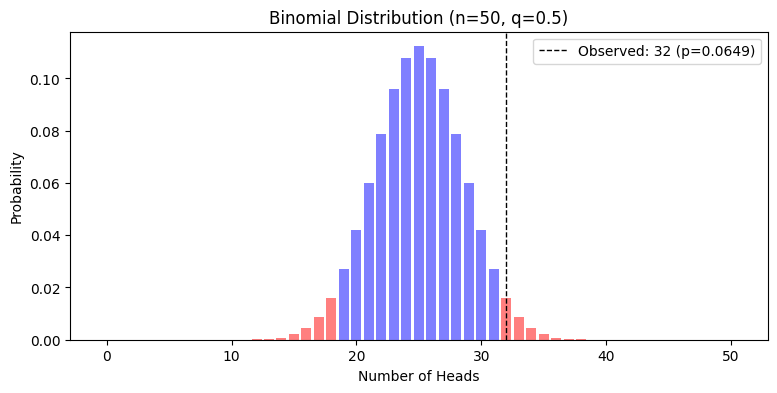

In [12]:
n_trials = 50
q_true = 0.6
n_observed = tosses(n_trials, q_true)

print(f"{n_observed} heads in {n_trials} tosses")
p_value = binomial_test(n_observed, n_trials)
print(f"p = {p_value:.4f}")
print("reject H0" if p_value<0.05 else "fail to reject H0")

plot_binomial_test(n_trials, n_observed)